In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set()

from sklearn.model_selection import train_test_split

import keras
from keras.datasets import mnist
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


## **Each MNIST image - Gray scale - 28 x 28 pixels**

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Training data shape {} {}'.format(x_train.shape,y_train.shape))
print('Testing  data shape {} {}'.format(x_test.shape,y_test.shape))

Training data shape (60000, 28, 28) (60000,)
Testing  data shape (10000, 28, 28) (10000,)


Displaying Image
Label of image  0


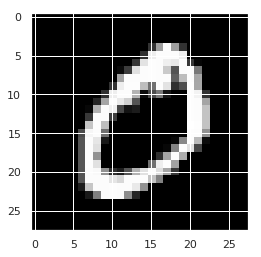

In [3]:
print('Displaying Image')
plt.imshow(x_train[1],cmap='gray')
print('Label of image ',y_train[1])

In [4]:
x_train = x_train.reshape(60000,-1)
x_test  = x_test.reshape(10000,-1)

x_train = x_train/255
x_test = x_test/255

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)


x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=100,stratify=y_train)

print('Training   data shape {} {}'.format(x_train.shape,y_train.shape))
print('Validation data shape {} {}'.format(x_val.shape,y_val.shape))
print('Testing    data shape {} {}'.format(x_test.shape,y_test.shape))

Training   data shape (54000, 784) (54000, 10)
Validation data shape (6000, 784) (6000, 10)
Testing    data shape (10000, 784) (10000, 10)


In [5]:
model = Sequential()
model.add(Dense(64,input_shape=(784, ),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

W0823 23:57:38.563886 139663477057408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0823 23:57:38.583070 139663477057408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0823 23:57:38.587724 139663477057408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0823 23:57:38.632858 139663477057408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0823 23:57:38.644069 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                170       
Total para

In [6]:
filepath="weights_best.hdf5"
checkpoint = [ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')]
history = model.fit(x_train,y_train,epochs=50,verbose=1,validation_split=0.1,batch_size=64,callbacks=checkpoint)

W0823 23:57:38.878084 139663477057408 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48600 samples, validate on 5400 samples
Epoch 1/50
48600/48600 [==============================] - 4s 82us/step - loss: 0.5364 - acc: 0.8323 - val_loss: 0.2294 - val_acc: 0.9372

Epoch 00001: val_acc improved from -inf to 0.93722, saving model to weights_best.hdf5
Epoch 2/50
48600/48600 [==============================] - 3s 65us/step - loss: 0.2288 - acc: 0.9362 - val_loss: 0.1631 - val_acc: 0.9559

Epoch 00002: val_acc improved from 0.93722 to 0.95593, saving model to weights_best.hdf5
Epoch 3/50
48600/48600 [==============================] - 3s 63us/step - loss: 0.1678 - acc: 0.9528 - val_loss: 0.1385 - val_acc: 0.9607

Epoch 00003: val_acc improved from 0.95593 to 0.96074, saving model to weights_best.hdf5
Epoch 4/50
48600/48600 [==============================] - 3s 63us/step - loss: 0.1354 - acc: 0.9624 - val_loss: 0.1227 - val_acc: 0.9637

Epoch 00004: val_acc improved from 0.96074 to 0.96370, saving model to weights_best.hdf5
Epoch 5/50
48600/48600 [======================

In [7]:
score = model.evaluate(x_test, y_test, verbose=1)
print("Test score:  ", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 25us/step
Test score:   0.1694683479951793
Test accuracy: 0.9718


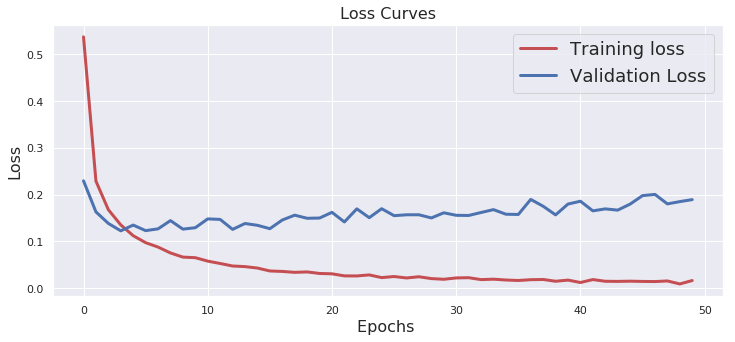

In [8]:
fig1 = plt.figure(figsize=(12,5))
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
#fig1.savefig('loss.png')
plt.show()

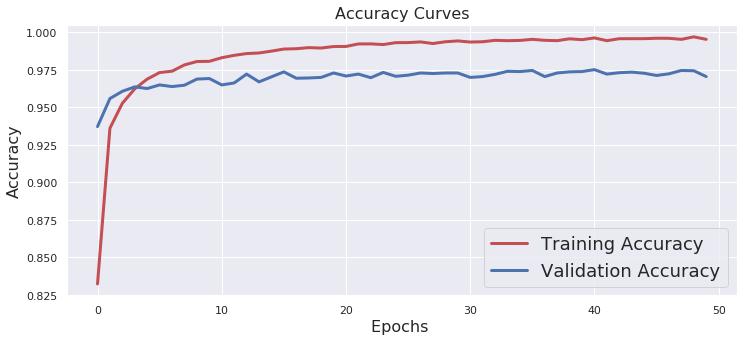

In [9]:
fig2=plt.figure(figsize=(12,5))
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
#fig2.savefig('accuracy.png')
plt.show()